In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import itertools as it
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = 'https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020'
r = requests.get(url)
soup = BeautifulSoup(r.content)

In [3]:
table = soup.find('table', attrs={'class': "wikitable gauche"})

In [4]:
def collect_table(table_html):
    head = [th.text.replace('\n', '') for th in table.find_all('th')]
    cells = [i.text for i in table.find_all('td')]
    n_col = len(head)
    df = pd.DataFrame({col: cells[i::n_col] for i, col in enumerate(head)})
    df = df.applymap(lambda x: x.replace('\n', '')).set_index('Rang').astype({col: 'uint8' for col in head[2:-1]})
    return df

In [5]:
# collect classement depuis wikipedia
df = collect_table(table)

In [11]:
def effectif_table(name, list_url):
    r = requests.get([i for i in list_url if name in i][0])
    soup = BeautifulSoup(r.content)
    table = soup.find('table', attrs={'class': "toccolours centre"}).tbody
    [th.text.replace('\n', '') for th in table.tr.find_all('th', attrs={'scope': "col"})]
    subtable = table.find('table', attrs={'class': "sortable"})
    headers = [th.text.replace('\n', '').replace('\xa0', '') for th in subtable.find_all('th')]
    cells = [i.text for i in subtable.find_all('td')]
    n_col = len(headers)
    print(len(cells), headers)
    df = pd.DataFrame({col: cells[i::n_col] for i, col in enumerate(headers)})
    df = df.applymap(lambda x: x.replace('\n', '')).set_index('No')
    return df

In [135]:
url = 'https://fr.wikipedia.org/wiki/LOSC_Lille'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml')

a = soup.find('table', attrs={'class': "sortable"})
headers = [th.text.replace('\n', '').replace('\xa0', '') for th in a.find_all('th')]

def line(r):
    c = [v for v in r.find_all('td')]
    return c[0].text, c[1].text, c[2].a['title'], c[3].find_all('span')[1].text, c[4].text, c[5].text, c[6].text

df = pd.DataFrame([line(i) for i in a.find_all('tr')[1:]], columns=headers[:-1])
df = df.applymap(lambda x: x.replace('\n', '')).set_index('No')

## lfp website

In [4]:
sai = 103; journee1=0; journee2 = 4; cat='Gen' #Dom, Gen
url = 'https://www.lfp.fr/ligue1/classement'+'?sai={}&journee1={}&journee2={}&cat={}'.format(sai, journee1, journee2, cat)
r = requests.get(url, verify=False)
soup = BeautifulSoup(r.content, 'lxml')

classement_table = soup.find('table')

head = [i.text for i in classement_table.find_all('th')]

cells = [i.text.replace('  ', '').replace('\t', '').replace('\n', '') for i in classement_table.find_all('td')]

n_col = len(head)

pd.DataFrame({col: cells[i::n_col] for i, col in enumerate(head)}).set_index('Position')

C:\Users\micka\Anaconda3\envs\data_science\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,Club,Pts,J,G,N,P,Bp,Bc,Diff.
Position,,,,,,,,,
1,Paris Saint-Germain,9,4,3,0,1,10,2,+8
2,Stade Rennais FC,9,4,3,0,1,6,3,+3
3,OGC Nice,9,4,3,0,1,7,5,+2
4,Angers SCO,9,4,3,0,1,8,7,+1
5,Olympique Lyonnais,7,4,2,1,1,10,2,+8
6,Stade de Reims,7,4,2,1,1,4,1,+3
7,FC Nantes,7,4,2,1,1,4,3,+1
8,Olympique de Marseille,7,4,2,1,1,3,3,0
9,Toulouse FC,7,4,2,1,1,4,5,-1


In [5]:
# collect url from all the teams
team_urls = [team['href'] for team in classement_table.find_all('a')]

In [6]:
url_lfp = 'https://www.lfp.fr'

In [7]:
options = ['calendrier', 'effectif', 'alaune']
url = url_lfp + team_urls[12] + '/' + options[0]

In [5]:
r = requests.get(url, verify=False)
soup = BeautifulSoup(r.content, 'lxml')
cal = soup.find('div', attrs={'id': "calendrier_club"})

for tr in cal.find_all('tr'):
    try:
        if 'ico_l1' in tr.find('td').img['src'] and tr.find('td', attrs={'class': "stats"}).a.text != '':
            print(tr.find('td', attrs={'class': "stats"}).a['href'])
    except:
        pass

SSLError: HTTPSConnectionPool(host='www.lfp.fr', port=443): Max retries exceeded with url: /ligue1/classement?sai=103&journee1=0&journee2=4&cat=Gen (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')],)",),))

## Calendrier

In [8]:
sai, jour = 102, 1
def collect_one_day(day, sai):
    url_calendar = 'https://www.lfp.fr/ligue1/calendrier_resultat?sai={}&jour={}'.format(sai, day)
    r = requests.get(url_calendar, verify=False)
    soup = BeautifulSoup(r.content, 'lxml')
    cal = soup.find('div', attrs={'id': "calendrier_journee"})
    url = []
    team1 = []
    team2 = []
    score = []
    for tr in cal.find_all('tr'):
        try:
            url.append(tr.find('td', attrs={'class': "stats"}).a['href'])
            team1.append(tr.find('td', attrs={'class': "domicile"}).text.replace('  ', '').replace('\n', ''))
            team2.append(tr.find('td', attrs={'class': "exterieur"}).text.replace('  ', '').replace('\n', ''))
            score.append(tr.find('td', attrs={'class': "stats"}).a.text)
        except:
            pass
    return team1, team2, score, url

In [14]:
def create_df_calendrier(sai, n):
    # create the dict
    data = {}
    data['day'] = []
    data['team1'] = []
    data['team2'] = []
    data['score'] = []
    data['url'] = []
    # fill the the dict with data 
    for i in range(1, n):
        team1, team2, score, url = collect_one_day(i, sai)
        data['day'] += [i for _ in range(len(team1))]
        data['team1'] += team1
        data['team2'] += team2
        data['score'] += score
        data['url'] += url
    # data with score 
    df = pd.DataFrame(data)
    # df[['score_team1','score_team2']] = pd.DataFrame(df.score.str.split(' - ').values.tolist(), index= df.index).astype('int')
    # df.drop(columns='score', inplace=True)
    return df

In [15]:
df = create_df_calendrier(103, 39)

C:\Users\micka\Anaconda3\envs\data_science\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\micka\Anaconda3\envs\data_science\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\micka\Anaconda3\envs\data_science\lib\site-packages\urllib3\connectionpool.py:851: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Users\micka\Anaconda3\envs\data_science\lib\site-packag

In [18]:
df.to_csv('../data/calendrier_l1.csv')

## Compute the goal scored/conceded at the last 4 matchs.

In [10]:
def create_goal_features(df, k):
    test = df.sort_values(by=['team1', 'day'])
    for i in range(1,20):
        test['score_team1_{}'.format(i)] = test.groupby(['team1']).score_team1.shift(i)
        test['score_team2_{}'.format(i)] = test.groupby(['team1']).score_team2.shift(i)

    # TODO: replace the mean with a weighted mean.
    test['goal_home_last'] = test[['score_team1_{}'.format(i) for i in range(1,k)]].apply(lambda x: np.nan if x.isna().sum() > 0 else sum([y*(i+1)/len(x) for i, y in enumerate(x)]), axis=1)
    test['conc_home_last'] = test[['score_team2_{}'.format(i) for i in range(1,k)]].apply(lambda x: np.nan if x.isna().sum() > 0 else sum([y*(i+1)/len(x) for i, y in enumerate(x)]), axis=1)

    test.drop(columns=['score_team1_{}'.format(i) for i in range(1,20)]+['score_team2_{}'.format(i) for i in range(1,20)], inplace=True)

    test = test.sort_values(by=['team2', 'day'])
    for i in range(1,20):
        test['score_team2_{}'.format(i)] = test.groupby(['team2']).score_team2.shift(i)
        test['score_team1_{}'.format(i)] = test.groupby(['team2']).score_team1.shift(i)

    # TODO: replace the mean with a weighted mean.
    test['goal_ext_last'] = test[['score_team2_{}'.format(i) for i in range(1,k)]].apply(lambda x: np.nan if x.isna().sum() > 0 else sum([y*(i+1)/len(x) for i, y in enumerate(x)]), axis=1)
    test['conc_ext_last'] = test[['score_team1_{}'.format(i) for i in range(1,k)]].apply(lambda x: np.nan if x.isna().sum() > 0 else sum([y*(i+1)/len(x) for i, y in enumerate(x)]), axis=1)

    test.drop(columns=['score_team2_{}'.format(i) for i in range(1,20)]+['score_team1_{}'.format(i) for i in range(1,20)], inplace=True)

    f = lambda x: 1 if x > 0 else 0 if x == 0 else -1
    test['rslt'] = (test.score_team1 - test.score_team2).apply(f)

    test = test.sort_values(by=['team1', 'day'])
    for i in range(1,k):
        test['rslt_home_{}'.format(i)] = test.groupby(['team1']).rslt.shift(i)

    test['last_home_rslt'] = test[['rslt_home_{}'.format(i) for i in range(1,k)]].apply(lambda x: np.nan if x.isna().sum() > 0 else sum([y*(i+1)/len(x) for i, y in enumerate(x)]), axis=1)
    test.drop(columns=['rslt_home_{}'.format(i) for i in range(1,k)], inplace=True) 

    test = test.sort_values(by=['team2', 'day'])
    for i in range(1,k):
        test['rslt_ext_{}'.format(i)] = test.groupby(['team2']).rslt.shift(i)

    test['last_ext_rslt'] = test[['rslt_ext_{}'.format(i) for i in range(1,k)]].apply(lambda x: np.nan if x.isna().sum() > 0 else sum([y*(i+1)/len(x) for i, y in enumerate(x)]), axis=1)
    test.drop(columns=['rslt_ext_{}'.format(i) for i in range(1,k)], inplace=True)

    test.dropna(inplace=True)
    test.drop(columns='url', inplace=True)
    # encode rslt
    le = LabelEncoder()
    test.rslt = le.fit_transform(test.rslt)
    le_team = LabelEncoder()
    test.team1 = le_team.fit_transform(test.team1)
    test.team2 = le_team.transform(test.team2)
    # encode team
    return test, le_team

In [5]:
from sklearn.preprocessing import LabelEncoder

In [184]:
# encode rslt
le = LabelEncoder()
test.rslt = le.fit_transform(test.rslt)
  
# encode team
le_team = LabelEncoder()
test.team1 = le_team.fit_transform(test.team1)
test.team2 = le_team.transform(test.team2)

## Exploratory

## Test de prediction

In [344]:
# "C'est biensur n'importe quoi car on utilise des données futur pour prédire le passé"
# TODO: prendre les mêmes mais pour les 5 derniers matchs + les matchs d'avant (voir tout les match avec un malus dans le temps)
# Et mettre un coeficient en fonction des adversaires.
X = df2.drop(columns=['team1', 'team2', 'day', 'score_team1','score_team2'])
f = lambda x: 0 if x > 0 else 1 if x == 0 else 2
y = (df2['score_team1'] - df2['score_team2']).apply(f)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [47]:
from sklearn.metrics import roc_auc_score

In [7]:
X_train_t = pd.DataFrame(columns=['goal_home_last', 'conc_home_last', 'goal_ext_last', 'conc_ext_last',
       'last_home_rslt', 'last_ext_rslt'])
y_train_t = pd.Series()
k = 3
day_train = 39
sais = [102, 101, 84, 83, 82, 81, 80]
for sai in sais:
    df_train, _ = create_goal_features(create_df_calendrier(sai, day_train), k)
    X_train = df_train.drop(columns=['day','team1','team2','score_team1', 'score_team2', 'rslt'])
    y_train = df_train.rslt
    X_train_t = pd.concat([X_train_t, X_train])
    y_train_t = pd.concat([y_train_t, y_train])
    
df_prod, le_team = create_goal_features(create_df_calendrier(103, 11), k)
X_prod = df_prod.drop(columns=['day','team1','team2','score_team1', 'score_team2', 'rslt'])
y_prod = df_prod.rslt

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_train_t, y_train_t, random_state=1234, test_size=0.1)

In [66]:
def train_test_model(X_train, y_train, X_test, y_test, arg_model):
    rf = RandomForestClassifier(**arg_model, n_jobs=-1, random_state=0, class_weight='balanced')
    rf.fit(X_train, y_train)
    pred = rf.predict_proba(X_test) 
    ohe_pred = np.zeros((len(pred), 3))
    ohe_pred[np.arange(len(pred)), np.argmax(pred, axis=1)] = 1
    ohe_true = np.zeros((len(pred), 3))
    ohe_true[np.arange(len(pred)), y_test.values] = 1
    return roc_auc_score(ohe_true, ohe_pred)

In [89]:
my_dict={'n_estimators':[5, 10, 15, 20, 25, 30],'max_depth':[2, 4, 6, 8],'min_samples_leaf':[5, 10, 15, 20, 25]}

def grid_search(my_dict, X_train, y_train, X_test, y_test):
    best_parameters = None
    best_score = None
    combinations = it.product(*(my_dict[Name] for Name in my_dict))
    for i in combinations:
        n_estimators, max_depth, min_samples_leaf= i
        arg_model = {'n_estimators': n_estimators, 'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf} 
        score = train_test_model(X_train, y_train, X_test, y_test, arg_model)

            
        if best_parameters is not None:
            if score > best_score:
                best_score = score
                best_parameters = arg_model
                print('Parameters model:', best_parameters)
                print('Score:', best_score)
        else:
            best_score = score
            best_parameters = arg_model
            print('Parameters model:', best_parameters)
            print('Score:', best_score)
    return best_score, best_parameters

In [90]:
best_score, best_parameters = grid_search(my_dict, X_train_t, y_train_t, X_prod, y_prod)

Parameters model: {'n_estimators': 5, 'max_depth': 2, 'min_samples_leaf': 5}
Score: 0.4263888888888889
Parameters model: {'n_estimators': 5, 'max_depth': 4, 'min_samples_leaf': 5}
Score: 0.440625
Parameters model: {'n_estimators': 5, 'max_depth': 4, 'min_samples_leaf': 15}
Score: 0.45868055555555554
Parameters model: {'n_estimators': 5, 'max_depth': 8, 'min_samples_leaf': 10}
Score: 0.46423611111111107
Parameters model: {'n_estimators': 5, 'max_depth': 8, 'min_samples_leaf': 20}
Score: 0.48090277777777773
Parameters model: {'n_estimators': 10, 'max_depth': 6, 'min_samples_leaf': 5}
Score: 0.48541666666666666
Parameters model: {'n_estimators': 20, 'max_depth': 2, 'min_samples_leaf': 5}
Score: 0.49756944444444445
Parameters model: {'n_estimators': 20, 'max_depth': 6, 'min_samples_leaf': 15}
Score: 0.4989583333333334
Parameters model: {'n_estimators': 25, 'max_depth': 2, 'min_samples_leaf': 5}
Score: 0.5020833333333333


In [69]:
rf = RandomForestClassifier(**best_parameters, random_state=0, class_weight='balanced')
rf.fit(X_train_t, y_train_t)
pred = rf.predict_proba(X_prod)
ohe_pred = np.zeros((len(pred), 3))
ohe_pred[np.arange(len(pred)), np.argmax(pred, axis=1)] = 1
ohe_true = np.zeros((len(pred), 3))
ohe_true[np.arange(len(pred)), y_prod.values] = 1
roc_auc_score(ohe_true, ohe_pred)

0.5020833333333333

In [75]:
cm = confusion_matrix(np.where(ohe_true==1)[1], np.where(ohe_pred==1)[1])

## predict the next saison

In [76]:
pred = rf.predict(X_prod)
accuracy_score(y_prod, pred)

0.35714285714285715

In [77]:
proba = rf.predict_proba(X_prod)
rslt_df = pd.DataFrame({'Home_team':le_team.classes_[df_prod.team1[X_prod.index]], 
              'Away_team' :le_team.classes_[df_prod.team2[X_prod.index]], 
              'home_win': proba[:,2],
              'drawback': proba[:,1],
              'away_win': proba[:,0]})

In [85]:
teams = rslt_df.Home_team.unique()
team = teams[9]
home_away = ['Home_team', 'Away_team'][1]
one_rslt_df = rslt_df[rslt_df[home_away] == team].drop(columns=home_away)

In [86]:
# Data
def plot_bar_proba(one_rslt_df, team, home_away):
    r = [i for i in range(one_rslt_df.shape[0])]

    # From raw value to percentage
    totals = [i+j+k for i,j,k in zip(one_rslt_df['home_win'], one_rslt_df['drawback'], one_rslt_df['away_win'])]
    greenBars = [i / j * 100 for i,j in zip(one_rslt_df['home_win'], totals)]
    orangeBars = [i / j * 100 for i,j in zip(one_rslt_df['drawback'], totals)]
    blueBars = [i / j * 100 for i,j in zip(one_rslt_df['away_win'], totals)]

    # plot
    barWidth = 0.85
    names = tuple(one_rslt_df.iloc[:,0])
    # Create green Bars
    plt.barh(r, greenBars, color='#b5ffb9', edgecolor='white', height=barWidth)
    # Create orange Bars
    plt.barh(r, orangeBars, left=greenBars, color='#f9bc86', edgecolor='white', height=barWidth)
    # Create blue Bars
    plt.barh(r, blueBars, left=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', height=barWidth)

    # Custom x axis
    plt.yticks(r, names)
    plt.ylabel("group")
    plt.title(team + ' -> ' + home_away)
    
    # Show graphic
    plt.show()

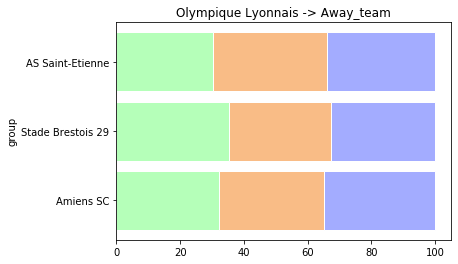

In [87]:
plot_bar_proba(one_rslt_df, team, home_away)

In [80]:
teams

array(['Stade de Reims', 'Montpellier Hérault SC', 'Angers SCO',
       'Nîmes Olympique', 'Girondins de Bordeaux', 'FC Metz',
       'Toulouse FC', 'Paris Saint-Germain', 'OGC Nice',
       'Olympique Lyonnais', 'AS Saint-Etienne', 'Stade Brestois 29',
       'RC Strasbourg Alsace', 'Amiens SC', 'Stade Rennais FC',
       'Olympique de Marseille', 'Dijon FCO', 'LOSC', 'AS Monaco',
       'FC Nantes'], dtype=object)

<BarContainer object of 3 artists>

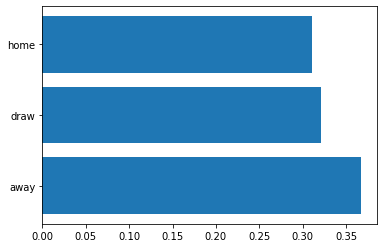

In [88]:
team1, team2 = np.where(teams == 'AS Monaco')[0][0], np.where(teams == 'Stade Rennais FC')[0][0]
h_t = df_prod[df_prod.team1 == team1][['goal_home_last', 'conc_home_last', 'last_home_rslt']].iloc[-1]
a_t = df_prod[df_prod.team2 == team2][['goal_ext_last', 'conc_ext_last', 'last_ext_rslt']].iloc[-1]
plt.barh(['away', 'draw', 'home'], rf.predict_proba(np.expand_dims(pd.concat((h_t, a_t)).values, axis=0)).flatten())

In [82]:
# Reims; Lyon; Angers; Nîmes (+60%); Toulouse; Nantes; Metz; 
# Bordeaux/saint drawback; Monaco; Marseille

In [83]:
cm

array([[ 5,  3,  8],
       [ 7,  3,  6],
       [ 5,  7, 12]], dtype=int64)

([0, 1, 2, 3, 4, 5], <a list of 6 Text xticklabel objects>)

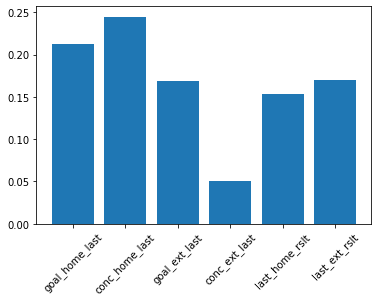

In [84]:
plt.bar(X_prod.columns, rf.feature_importances_)
plt.xticks(rotation=45)

## Collect the statistics for each match

In [11]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from threading import Thread
from ipypb import track
from time import sleep

options = Options()
options.add_argument('--headless')

In [17]:
ids = [i[-5:] for i in url_l][:100]

In [19]:
class StatsGetter(Thread):
    def __init__(self, id):
        super().__init__()
        self.id = id
        
    def run(self):
        url_match = 'https://www.lfp.fr/ligue1/feuille_match/{}/stats'.format(self.id)
        driver = webdriver.Firefox(options=options) # define the webdriver (Firefox, PhantomJS, chrome,...)
        try:
            driver.get(url_match) # load the webpage
            soup = BeautifulSoup(driver.page_source, 'lxml')
            rows = soup.find('div', attrs={'id': "bloc_statistiques"}).find('tbody').find_all('tr')
            self.quote = {row.find('th').text: tuple(int(i.text) for i in row.find_all('td')) for row in rows}
        except:
            self.quote = ''

In [20]:
def get_stats(ids):
    threads = [StatsGetter(i) for i in ids]
    for thread in track(threads):
        sleep(0.2)
        thread.start()
    for thread in track(threads):
        sleep(0.2)
        thread.join()
    quotes = dict(zip(ids, [thread.quote for thread in threads]))
    return quotes

In [17]:
idx_last_day = [i[-5:] for i in collect_one_day(2, 102)[3]]

In [22]:
A = get_stats(idx_last_day)

 [████████████████████████████████████████████████████████████] 10/10 [00:03<00:00, 0.27s/it]

 [████████████████████████████████████████████████████████████] 10/10 [01:14<00:00, 7.36s/it]

## fm data

In [170]:
'https://fmdataba.com/'

'https://fmdataba.com/'

In [2]:
r = requests.get('https://fmdataba.com/20/c/2357/amiens-sc/')
soup = BeautifulSoup(r.content, 'lxml')

In [3]:
soup

<html><body><h3>bot activity detected please contact moderator.</h3><h2>y.e.ygt@hotmail.com</h2></body></html>